# 1. load the data as DataFrame
Trying to load the JSON file and trim the file to a small file to do faster EDA

# Trimm the Json file to a smaller one

Eliminate unneccesary colums

# Step 1: arxiv-metadata-oai-snapshot.json

In [ ]:
import json

In [ ]:
file_path = 'arxiv-metadata-oai-snapshot.json'

with open(file_path, 'r') as json_file:
    line_count = 0
    first_1000 = []
    
    for line in json_file:
        try:
            # Lade jedes JSON-Objekt in der Zeile
            data = json.loads(line)
            first_1000.append(data)
            line_count += 1
        except json.JSONDecodeError as e:
            print(f"Fehler beim Einlesen der Zeile: {e}")
    

with open(file_path, 'w') as json_file:
    json.dump(first_1000, json_file, indent=4)
    
print("done!")


drop all earlier versions

In [ ]:

with open(file_path, 'r') as json_file:
    data = json.load(json_file)
    for entry in data:
        entry['versions'] = [entry['versions'][-1]]
    
with open('trimmed_arxvi_v.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

In [ ]:

with (open('trimmed_arxvi_v.json', 'r') as json_file):
    data = json.load(json_file)
    for entry in data:
        versions = entry.get('versions', [])
        if versions:
            first_version = versions[0]
            datum = first_version.get('created')
            entry['versions'] = datum
      
with open('trimmed_arxvi_v.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

# Step 2: trimmed_arxvi_v.json

Transform the Json to DataFranme

In [ ]:
import pandas as pd
import json

In [ ]:
json_file_path = 'trimmed_arxvi_v.json'

In [ ]:
with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)
df = pd.DataFrame(data)


Basic EDA in Pandas

In [ ]:
df.head()


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
print(df.columns)

Irrelevante Spalten löschen

In [ ]:
df = df.drop(columns='abstract')
df = df.drop(columns='submitter')
df = df.drop(columns='authors_parsed')
df = df.drop(columns='update_date')
df = df.drop(columns='journal-ref')
df = df.drop(columns='comments')
df = df.drop(columns='doi')
df = df.drop(columns='report-no')
df = df.drop(columns='license')

In [ ]:
print(df.columns)

DatFrame zwischenspeichern

In [ ]:
df.to_csv('dataframe_short.csv', index=False)


# Step 3: dataframe_short.csv

In [ ]:
df = pd.read_csv('dataframe_short.csv')

In [ ]:
print(df.columns)

In [ ]:
df.rename(columns={'versions': 'datetime'}, inplace=True)

First Plotting

In [ ]:
data_types = df.dtypes

print("Datenformate im DataFrame:")
print(data_types)

In [ ]:
print(df.columns)

In [ ]:
from datetime import datetime
df['datetime'] = pd.to_datetime(df['datetime'], format="%a, %d %b %Y %H:%M:%S GMT")

# Überprüfen Sie die Datenformate der Spalten
data_types = df.dtypes

print("Datenformate im DataFrame:")
print(data_types)

In [ ]:
print(df['datetime'].max())
print(df['datetime'].min())
df.__len__()


Some Plots for Data understanding

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df['date'] = df['datetime'].dt.strftime('%Y')
daily_counts = df['date'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
daily_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Number of entries per year')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [ ]:
def fetch_categories(df, category_col):
    # Create an empty set to store the unique categories
    categories = set()
    # Iterate over each row in the DataFrame
    for i in range(len(df)):
        # Split the value in the specified category column and add the resulting categories to the set
        categories.update(x for x in df.iloc[i][category_col].split())
    # Return the set of unique categories
    return categories

categories = fetch_categories(df, 'categories')
print(categories)




In [ ]:

# Generate category vector for each item in the user profile and recommender datasets
df['categories'] = df['categories'].apply(lambda x: x.split())

df.head()

In [ ]:
import ast

# Step 4 ETL_dataframe_short.csv

In [ ]:
df.to_csv('ETL_dataframe_short.csv', index=False)

In [24]:
df = pd.read_csv('ETL_dataframe_short.csv')

C:\Users\thoma\AppData\Local\Temp\ipykernel_39328\4582556.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ETL_dataframe_short.csv')


In [ ]:
df.head()

In [ ]:
category_counts2 = df['categories'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
category_counts2.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Kategorie')
plt.ylabel('Anzahl')
plt.title('Anzahl der Einträge pro Kategorie')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [ ]:
df['categories'].value_counts().head(30)

# Step 5: Create subject_map Table

In [ ]:

category_map = {'astro-ph': 'Astrophysics',
'astro-ph.CO': 'Cosmology and Nongalactic Astrophysics',
'astro-ph.EP': 'Earth and Planetary Astrophysics',
'astro-ph.GA': 'Astrophysics of Galaxies',
'astro-ph.HE': 'High Energy Astrophysical Phenomena',
'astro-ph.IM': 'Instrumentation and Methods for Astrophysics',
'astro-ph.SR': 'Solar and Stellar Astrophysics',
'cond-mat.dis-nn': 'Disordered Systems and Neural Networks',
'cond-mat.mes-hall': 'Mesoscale and Nanoscale Physics',
'cond-mat.mtrl-sci': 'Materials Science',
'cond-mat.other': 'Other Condensed Matter',
'cond-mat.quant-gas': 'Quantum Gases',
'cond-mat.soft': 'Soft Condensed Matter',
'cond-mat.stat-mech': 'Statistical Mechanics',
'cond-mat.str-el': 'Strongly Correlated Electrons',
'cond-mat.supr-con': 'Superconductivity',
'cs.AI': 'Artificial Intelligence',
'cs.AR': 'Hardware Architecture',
'cs.CC': 'Computational Complexity',
'cs.CE': 'Computational Engineering, Finance, and Science',
'cs.CG': 'Computational Geometry',
'cs.CL': 'Computation and Language',
'cs.CR': 'Cryptography and Security',
'cs.CV': 'Computer Vision and Pattern Recognition',
'cs.CY': 'Computers and Society',
'cs.DB': 'Databases',
'cs.DC': 'Distributed, Parallel, and Cluster Computing',
'cs.DL': 'Digital Libraries',
'cs.DM': 'Discrete Mathematics',
'cs.DS': 'Data Structures and Algorithms',
'cs.ET': 'Emerging Technologies',
'cs.FL': 'Formal Languages and Automata Theory',
'cs.GL': 'General Literature',
'cs.GR': 'Graphics',
'cs.GT': 'Computer Science and Game Theory',
'cs.HC': 'Human-Computer Interaction',
'cs.IR': 'Information Retrieval',
'cs.IT': 'Information Theory',
'cs.LG': 'Machine Learning',
'cs.LO': 'Logic in Computer Science',
'cs.MA': 'Multiagent Systems',
'cs.MM': 'Multimedia',
'cs.MS': 'Mathematical Software',
'cs.NA': 'Numerical Analysis',
'cs.NE': 'Neural and Evolutionary Computing',
'cs.NI': 'Networking and Internet Architecture',
'cs.OH': 'Other Computer Science',
'cs.OS': 'Operating Systems',
'cs.PF': 'Performance',
'cs.PL': 'Programming Languages',
'cs.RO': 'Robotics',
'cs.SC': 'Symbolic Computation',
'cs.SD': 'Sound',
'cs.SE': 'Software Engineering',
'cs.SI': 'Social and Information Networks',
'cs.SY': 'Systems and Control',
'econ.EM': 'Econometrics',
'eess.AS': 'Audio and Speech Processing',
'eess.IV': 'Image and Video Processing',
'eess.SP': 'Signal Processing',
'gr-qc': 'General Relativity and Quantum Cosmology',
'hep-ex': 'High Energy Physics - Experiment',
'hep-lat': 'High Energy Physics - Lattice',
'hep-ph': 'High Energy Physics - Phenomenology',
'hep-th': 'High Energy Physics - Theory',
'math.AC': 'Commutative Algebra',
'math.AG': 'Algebraic Geometry',
'math.AP': 'Analysis of PDEs',
'math.AT': 'Algebraic Topology',
'math.CA': 'Classical Analysis and ODEs',
'math.CO': 'Combinatorics',
'math.CT': 'Category Theory',
'math.CV': 'Complex Variables',
'math.DG': 'Differential Geometry',
'math.DS': 'Dynamical Systems',
'math.FA': 'Functional Analysis',
'math.GM': 'General Mathematics',
'math.GN': 'General Topology',
'math.GR': 'Group Theory',
'math.GT': 'Geometric Topology',
'math.HO': 'History and Overview',
'math.IT': 'Information Theory',
'math.KT': 'K-Theory and Homology',
'math.LO': 'Logic',
'math.MG': 'Metric Geometry',
'math.MP': 'Mathematical Physics',
'math.NA': 'Numerical Analysis',
'math.NT': 'Number Theory',
'math.OA': 'Operator Algebras',
'math.OC': 'Optimization and Control',
'math.PR': 'Probability',
'math.QA': 'Quantum Algebra',
'math.RA': 'Rings and Algebras',
'math.RT': 'Representation Theory',
'math.SG': 'Symplectic Geometry',
'math.SP': 'Spectral Theory',
'math.ST': 'Statistics Theory',
'math-ph': 'Mathematical Physics',
'nlin.AO': 'Adaptation and Self-Organizing Systems',
'nlin.CD': 'Chaotic Dynamics',
'nlin.CG': 'Cellular Automata and Lattice Gases',
'nlin.PS': 'Pattern Formation and Solitons',
'nlin.SI': 'Exactly Solvable and Integrable Systems',
'nucl-ex': 'Nuclear Experiment',
'nucl-th': 'Nuclear Theory',
'physics.acc-ph': 'Accelerator Physics',
'physics.ao-ph': 'Atmospheric and Oceanic Physics',
'physics.app-ph': 'Applied Physics',
'physics.atm-clus': 'Atomic and Molecular Clusters',
'physics.atom-ph': 'Atomic Physics',
'physics.bio-ph': 'Biological Physics',
'physics.chem-ph': 'Chemical Physics',
'physics.class-ph': 'Classical Physics',
'physics.comp-ph': 'Computational Physics',
'physics.data-an': 'Data Analysis, Statistics and Probability',
'physics.ed-ph': 'Physics Education',
'physics.flu-dyn': 'Fluid Dynamics',
'physics.gen-ph': 'General Physics',
'physics.geo-ph': 'Geophysics',
'physics.hist-ph': 'History and Philosophy of Physics',
'physics.ins-det': 'Instrumentation and Detectors',
'physics.med-ph': 'Medical Physics',
'physics.optics': 'Optics',
'physics.plasm-ph': 'Plasma Physics',
'physics.pop-ph': 'Popular Physics',
'physics.soc-ph': 'Physics and Society',
'physics.space-ph': 'Space Physics',
'q-bio.BM': 'Biomolecules',
'q-bio.CB': 'Cell Behavior',
'q-bio.GN': 'Genomics',
'q-bio.MN': 'Molecular Networks',
'q-bio.NC': 'Neurons and Cognition',
'q-bio.OT': 'Other Quantitative Biology',
'q-bio.PE': 'Populations and Evolution',
'q-bio.QM': 'Quantitative Methods',
'q-bio.SC': 'Subcellular Processes',
'q-bio.TO': 'Tissues and Organs',
'q-fin.CP': 'Computational Finance',
'q-fin.EC': 'Economics',
'q-fin.GN': 'General Finance',
'q-fin.MF': 'Mathematical Finance',
'q-fin.PM': 'Portfolio Management',
'q-fin.PR': 'Pricing of Securities',
'q-fin.RM': 'Risk Management',
'q-fin.ST': 'Statistical Finance',
'q-fin.TR': 'Trading and Market Microstructure',
'quant-ph': 'Quantum Physics',
'stat.AP': 'Applications',
'stat.CO': 'Computation',
'stat.ME': 'Methodology',
'stat.ML': 'Machine Learning',
'stat.OT': 'Other Statistics',
'stat.TH': 'Statistics Theory'}


# Umwandeln der category_map in ein DataFrame
df_map = pd.DataFrame(list(category_map.items()), columns=['Category', 'Category_Description'])
df_map[['subject', 'specific_subject']] = df_map['Category'].str.split('.', expand=True)

df_map.head()
# Speichern des DataFrames in eine CSV-Datei
#df_map.to_csv('category_map.csv', index=False)

#print("CSV-Datei wurde erfolgreich erstellt.")

# Link the subject map to the category Map

In [ ]:
subject_map ={'cs': 'Computer Science',
              'math': 'Mathematics',
              'physics': 'Physics',
              'q-bio': 'Quantitative Biology',
              'q-fin': 'Quantitative Finance',
              'cond-mat' : 'Condensed Matter',
              'astro-ph' : 'Astro Physics',
              'stat' : 'Statistics',
              'nlin' : 'Nonlinear Sciences',
              'eess' : 'Signals',
              'hep-lat':'Physics',
              'hep-ph' : 'Physics',
              'hep-th' : 'Physics',
              'hep-ex' : 'Physics',
              'nucl-th': 'Physics',
              'nucl-ex':'Physics',
              'quant-ph':'Physics'}

df_subject_map = pd.DataFrame(list(subject_map.items()), columns=['subject', 'subject_Description'])
df_subject_map.to_csv('subject_map.csv', index=False)

In [ ]:
df_map_plus = df_map.merge(df_subject_map, on='subject', how='left')
print(df_map_plus)
df_map_plus.head()

In [ ]:
df_map_plus.to_csv('subject_description.csv', index=False)

In [ ]:
df_map_plus.head()


# Create a subject_description_csv

In [ ]:
df.head()

In [ ]:
import time
from tqdm import tqdm

In [ ]:
df.head()

In [25]:

df_map_plus = pd.read_csv('subject_description.csv')
df_map_plus.head(100)

,Category,Category_Description,subject,specific_subject,subject_Description
0,astro-ph,Astrophysics,astro-ph,NaN,Astro Physics
1,astro-ph.CO,Cosmology and Nongalactic Astrophysics,astro-ph,CO,Astro Physics
2,astro-ph.EP,Earth and Planetary Astrophysics,astro-ph,EP,Astro Physics
3,astro-ph.GA,Astrophysics of Galaxies,astro-ph,GA,Astro Physics
4,astro-ph.HE,High Energy Astrophysical Phenomena,astro-ph,HE,Astro Physics
...,...,...,...,...,...
95,math.SP,Spectral Theory,math,SP,Mathematics
96,math.ST,Statistics Theory,math,ST,Mathematics
97,math-ph,Mathematical Physics,math-ph,NaN,NaN
98,nlin.AO,Adaptation and Self-Organizing Systems,nlin,AO,Nonlinear Sciences


In [26]:
df['categories'] = df['categories'].apply(eval)

In [ ]:
df.head()

In [27]:
for item in df_map_plus['subject'].unique():
    tqdm.pandas(desc=f"Processing {item}")
    subject_description = df_map_plus[df_map_plus['subject'] == item]['subject_Description'].values[0]
    df[subject_description] = df['categories'].progress_apply(
        lambda test: any(
            [
                item in x
                for x in test
                if isinstance(test, list) and isinstance(item, str)
            ]
        )
    )



Processing stat: 100%|██████████| 2314976/2314976 [00:05<00:00, 436385.21it/s]


In [29]:
df.head(100)

,id,authors,title,categories,datetime,date,Astro Physics,Condensed Matter,Computer Science,NaN,Signals,Physics,Mathematics,Nonlinear Sciences,Quantitative Biology,Quantitative Finance,Statistics
0,704.0001,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,[hep-ph],2007-07-24 20:10:27,2007,False,False,False,False,False,False,False,False,False,False,False
1,704.0002,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,"[math.CO, cs.CG]",2008-12-13 17:26:00,2008,False,False,True,False,False,False,True,False,False,False,False
2,704.0003,Hongjun Pan,The evolution of the Earth-Moon system based o...,[physics.gen-ph],2008-01-13 00:36:28,2008,False,False,True,False,False,False,False,False,False,False,False
3,704.0004,David Callan,A determinant of Stirling cycle numbers counts...,[math.CO],2007-03-31 03:16:14,2007,False,False,False,False,False,False,True,False,False,False,False
4,704.0005,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"[math.CA, math.FA]",2007-04-02 18:09:58,2007,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,704.0096,M.C. Nucci and P.G.L. Leach,Much ado about 248,[nlin.SI],2007-04-01 17:28:15,2007,False,False,False,False,False,False,False,True,False,False,False
96,704.0097,Yasuyuki Kawahigashi,Conformal Field Theory and Operator Algebras,"[math-ph, math.MP, math.OA]",2007-04-01 18:02:55,2007,False,False,False,True,False,False,True,False,False,False,False
97,704.0098,"Jack Raymond, David Saad",Sparsely-spread CDMA - a statistical mechanics...,"[cs.IT, math.IT]",2008-04-30 15:36:55,2008,False,False,True,False,False,False,True,False,False,False,False
98,704.0099,Koenraad M.R. Audenaert and Jaspal Singh Aujla,On Ando's inequalities for convex and concave ...,[math.FA],2007-04-01 18:14:32,2007,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
df_map_plus.head()

In [30]:
df.to_csv('dataframe_subject_bool_final.csv', index=False)

In [ ]:
import pandas as pd
import json

In [31]:
df = pd.read_csv('dataframe_subject_bool_final.csv')

C:\Users\thoma\AppData\Local\Temp\ipykernel_39328\1506397222.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataframe_subject_bool_final.csv')


In [32]:
df.head()

,id,authors,title,categories,datetime,date,Astro Physics,Condensed Matter,Computer Science,Unnamed: 9,Signals,Physics,Mathematics,Nonlinear Sciences,Quantitative Biology,Quantitative Finance,Statistics
0,704.0001,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,['hep-ph'],2007-07-24 20:10:27,2007,False,False,False,False,False,False,False,False,False,False,False
1,704.0002,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,"['math.CO', 'cs.CG']",2008-12-13 17:26:00,2008,False,False,True,False,False,False,True,False,False,False,False
2,704.0003,Hongjun Pan,The evolution of the Earth-Moon system based o...,['physics.gen-ph'],2008-01-13 00:36:28,2008,False,False,True,False,False,False,False,False,False,False,False
3,704.0004,David Callan,A determinant of Stirling cycle numbers counts...,['math.CO'],2007-03-31 03:16:14,2007,False,False,False,False,False,False,True,False,False,False,False
4,704.0005,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"['math.CA', 'math.FA']",2007-04-02 18:09:58,2007,False,False,False,False,False,False,True,False,False,False,False


In [33]:
df['datetime'] = pd.to_datetime(df['datetime'])

data_types = df.dtypes

print("Datenformate im DataFrame:")
print(data_types)

Datenformate im DataFrame:
id                              object
authors                         object
title                           object
categories                      object
datetime                datetime64[ns]
date                             int64
Astro Physics                     bool
Condensed Matter                  bool
Computer Science                  bool
Unnamed: 9                        bool
Signals                           bool
Physics                           bool
Mathematics                       bool
Nonlinear Sciences                bool
Quantitative Biology              bool
Quantitative Finance              bool
Statistics                        bool
dtype: object


In [35]:
subject_count = df.groupby(df['datetime'].dt.year).sum(numeric_only=True)
subject_count.head(10)

,date,Astro Physics,Condensed Matter,Computer Science,Unnamed: 9,Signals,Physics,Mathematics,Nonlinear Sciences,Quantitative Biology,Quantitative Finance,Statistics
datetime,,,,,,,,,,,,
1986,1986,0,0,1,0,0,0,0,0,0,0,0
1988,1988,0,0,0,0,0,0,0,0,0,0,0
1989,9945,0,0,0,0,0,0,5,0,0,0,0
1990,47760,0,0,2,1,0,0,22,0,0,0,0
1991,676940,0,0,3,0,0,0,57,2,0,0,0
1992,6159264,118,274,1,4,0,0,340,19,2,0,0
1993,12966458,597,796,7,4,0,0,581,290,12,0,0
1994,19407602,1188,1489,293,7,0,31,891,357,25,0,1
1995,25067175,1854,2147,370,7,0,384,1126,524,37,0,0


In [36]:
from datetime import datetime
df['datetime'] = pd.to_datetime(df['datetime'])


In [37]:
df.head()

,id,authors,title,categories,datetime,date,Astro Physics,Condensed Matter,Computer Science,Unnamed: 9,Signals,Physics,Mathematics,Nonlinear Sciences,Quantitative Biology,Quantitative Finance,Statistics
0,704.0001,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,['hep-ph'],2007-07-24 20:10:27,2007,False,False,False,False,False,False,False,False,False,False,False
1,704.0002,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,"['math.CO', 'cs.CG']",2008-12-13 17:26:00,2008,False,False,True,False,False,False,True,False,False,False,False
2,704.0003,Hongjun Pan,The evolution of the Earth-Moon system based o...,['physics.gen-ph'],2008-01-13 00:36:28,2008,False,False,True,False,False,False,False,False,False,False,False
3,704.0004,David Callan,A determinant of Stirling cycle numbers counts...,['math.CO'],2007-03-31 03:16:14,2007,False,False,False,False,False,False,True,False,False,False,False
4,704.0005,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"['math.CA', 'math.FA']",2007-04-02 18:09:58,2007,False,False,False,False,False,False,True,False,False,False,False


In [80]:
df_excl_2023 = df[(df['year'] >= 2010) & (df['year'] <= 2022)]

# Gruppiere nach Jahr und zähle die Anzahl der Subjects
df_subject_counts = df_excl_2023.groupby('year')[['Astro Physics', 'Condensed Matter', 'Computer Science', 'Signals', 'Physics', 'Mathematics', 'Nonlinear Sciences', 'Quantitative Biology', 'Quantitative Finance', 'Statistics']].sum()


In [81]:
df_subject_counts.head(50)

,Astro Physics,Condensed Matter,Computer Science,Signals,Physics,Mathematics,Nonlinear Sciences,Quantitative Biology,Quantitative Finance,Statistics
year,,,,,,,,,,
2010,13013,12706,13636,0,4584,19052,1360,1172,482,0
2011,13420,13558,16112,4,5213,22308,1522,1362,511,0
2012,13791,14677,20811,3,5768,25258,1670,1660,583,0
2013,14088,15297,24050,6,5887,28398,1747,2231,700,0
2014,14398,15470,25899,4,6063,30363,1712,2154,788,0
2015,14788,16585,28624,18,6330,33338,1689,2226,768,0
2016,15173,17401,34717,22,6579,35401,1745,2452,911,0
2017,14915,17422,42031,515,6912,37134,1806,2450,853,0
2018,15870,17914,53960,3166,7159,38927,1718,2650,1006,0


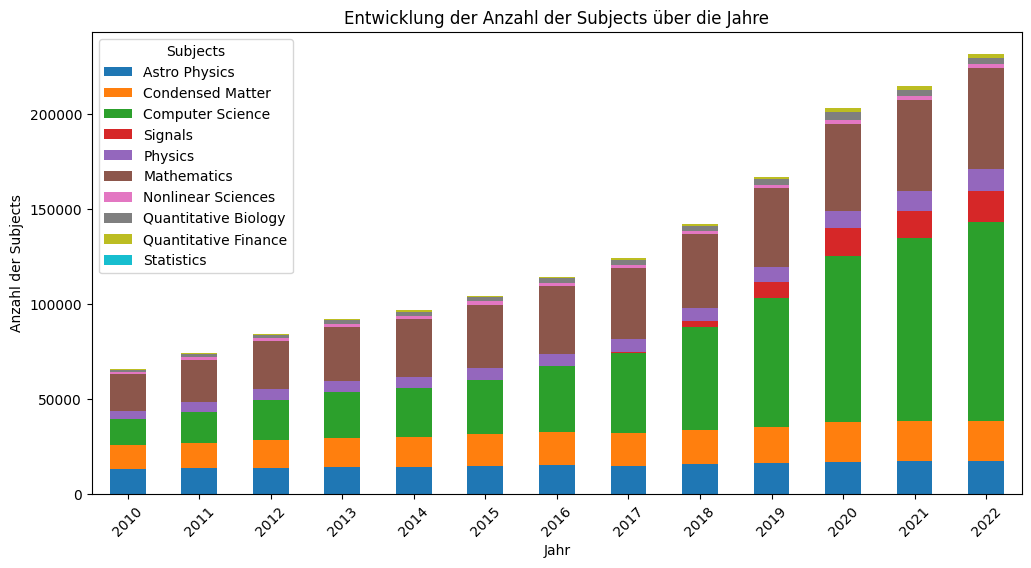

In [169]:
import pandas as pd
import matplotlib.pyplot as plt


# Gruppiere nach Jahr und zähle die Anzahl der Subjects
subject_counts = df_excl_2023.groupby('year')[['Astro Physics', 'Condensed Matter', 'Computer Science', 'Signals', 'Physics', 'Mathematics', 'Nonlinear Sciences', 'Quantitative Biology', 'Quantitative Finance', 'Statistics']].sum()


# Plot das Liniendiagramm
subject_counts.plot(kind='bar', stacked = True, figsize=(12, 6))

plt.title('Entwicklung der Anzahl der Subjects über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Subjects')
plt.legend(title='Subjects')
plt.xticks(rotation=45)
plt.show()




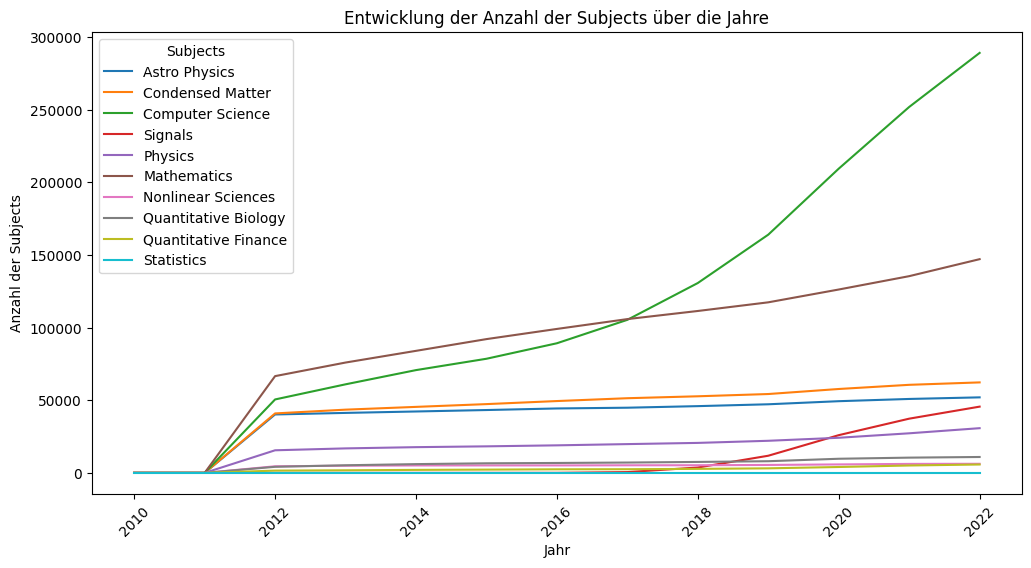

In [172]:


# Plot das Liniendiagramm
df_subject_trend.plot(kind='line', figsize=(12, 6))

plt.title('Entwicklung der Anzahl der Subjects über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Subjects')
plt.legend(title='Subjects')
plt.xticks(rotation=45)
plt.show()


In [86]:
# Definiere die Anzahl der letzten Jahre, die in die Trendlinie einbezogen werden sollen
window = 3

# Berechne die Trendlinie für jeden Fachbereich
df_subject_trend = subject_counts.rolling(window=window).sum()

# Da die ersten (window-1) Werte NaN sein werden, fülle sie mit Nullen auf
df_subject_trend.fillna(0, inplace=True)

# Du kannst df_subject_trend anzeigen, um die Ergebnisse zu überprüfen
df_subject_trend.head(20)


,Astro Physics,Condensed Matter,Computer Science,Signals,Physics,Mathematics,Nonlinear Sciences,Quantitative Biology,Quantitative Finance,Statistics
year,,,,,,,,,,
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,40224.0,40941.0,50559.0,7.0,15565.0,66618.0,4552.0,4194.0,1576.0,0.0
2013,41299.0,43532.0,60973.0,13.0,16868.0,75964.0,4939.0,5253.0,1794.0,0.0
2014,42277.0,45444.0,70760.0,13.0,17718.0,84019.0,5129.0,6045.0,2071.0,0.0
2015,43274.0,47352.0,78573.0,28.0,18280.0,92099.0,5148.0,6611.0,2256.0,0.0
2016,44359.0,49456.0,89240.0,44.0,18972.0,99102.0,5146.0,6832.0,2467.0,0.0
2017,44876.0,51408.0,105372.0,555.0,19821.0,105873.0,5240.0,7128.0,2532.0,0.0
2018,45958.0,52737.0,130708.0,3703.0,20650.0,111462.0,5269.0,7552.0,2770.0,0.0


# Analyse nach Subjects_Detail

In [58]:
df['categories'] = df['categories'].apply(eval)

for item in df_map_plus['subject'].unique():
    tqdm.pandas(desc=f"Processing {item}")
    subject_description = df_map_plus[df_map_plus['subject'] == item]['subject'].values[0]
    df[subject_description] = df['categories'].progress_apply(
        lambda test: any(
            [
                item in x
                for x in test
                if isinstance(test, list) and isinstance(item, str)
            ]
        )
    )



Processing stat: 100%|██████████| 2314976/2314976 [00:05<00:00, 410593.09it/s]


In [59]:
df.head()

,id,authors,title,categories,datetime,date,Astro Physics,Condensed Matter,Computer Science,Unnamed: 9,...,math,math-ph,nlin,nucl-ex,nucl-th,physics,q-bio,q-fin,quant-ph,stat
0,704.0001,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,[hep-ph],2007-07-24 20:10:27,2007,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,704.0002,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,"[math.CO, cs.CG]",2008-12-13 17:26:00,2008,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
2,704.0003,Hongjun Pan,The evolution of the Earth-Moon system based o...,[physics.gen-ph],2008-01-13 00:36:28,2008,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,704.0004,David Callan,A determinant of Stirling cycle numbers counts...,[math.CO],2007-03-31 03:16:14,2007,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,704.0005,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"[math.CA, math.FA]",2007-04-02 18:09:58,2007,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [89]:
print(df.columns)

Index(['id', 'authors', 'title', 'categories', 'datetime', 'date',
       'Astro Physics', 'Condensed Matter', 'Computer Science', 'Unnamed: 9',
       'Signals', 'Physics', 'Mathematics', 'Nonlinear Sciences',
       'Quantitative Biology', 'Quantitative Finance', 'Statistics', 'year',
       'astro-ph', 'cond-mat', 'cs', 'econ', 'eess', 'gr-qc', 'hep-ex',
       'hep-lat', 'hep-ph', 'hep-th', 'math', 'math-ph', 'nlin', 'nucl-ex',
       'nucl-th', 'physics', 'q-bio', 'q-fin', 'quant-ph', 'stat'],
      dtype='object')


In [90]:
print(df.columns)


Index(['id', 'authors', 'title', 'categories', 'datetime', 'date',
       'Astro Physics', 'Condensed Matter', 'Computer Science', 'Unnamed: 9',
       'Signals', 'Physics', 'Mathematics', 'Nonlinear Sciences',
       'Quantitative Biology', 'Quantitative Finance', 'Statistics', 'year',
       'astro-ph', 'cond-mat', 'cs', 'econ', 'eess', 'gr-qc', 'hep-ex',
       'hep-lat', 'hep-ph', 'hep-th', 'math', 'math-ph', 'nlin', 'nucl-ex',
       'nucl-th', 'physics', 'q-bio', 'q-fin', 'quant-ph', 'stat'],
      dtype='object')


As we can see the most trending science fields are Computer Science, Mathematics and Signals. For that reason we focus on these 3 fields. The other fields are out of Scope 

In [100]:
# Liste der gewünschten Spalten
selected_columns = ['id', 'authors', 'title', 'categories', 'datetime', 'date', 'Computer Science', 'Mathematics', 'Signals']

# Erstelle das neue DataFrame
df_top_3_subjects = df_top_3_subjects[df_top_3_subjects[['Computer Science', 'Mathematics', 'Signals']].any(axis=1)]




In [101]:
df_top_3_subjects.head(200)


,id,authors,title,categories,datetime,date,Computer Science,Mathematics,Signals
1,704.0002,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,"[math.CO, cs.CG]",2008-12-13 17:26:00,2008,True,True,False
2,704.0003,Hongjun Pan,The evolution of the Earth-Moon system based o...,[physics.gen-ph],2008-01-13 00:36:28,2008,True,False,False
3,704.0004,David Callan,A determinant of Stirling cycle numbers counts...,[math.CO],2007-03-31 03:16:14,2007,False,True,False
4,704.0005,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"[math.CA, math.FA]",2007-04-02 18:09:58,2007,False,True,False
9,704.001,Sergei Ovchinnikov,"Partial cubes: structures, characterizations, ...",[math.CO],2007-03-31 05:10:16,2007,False,True,False
...,...,...,...,...,...,...,...,...,...
561,704.0562,"Julien Mandon (PPM), Guy Guelachvili (PPM), Na...",Frequency modulation Fourier transform spectro...,[physics.optics],2007-04-04 12:46:36,2007,True,False,False
562,704.0563,Ignazio Licata,Universe Without Singularities. A Group Approa...,[physics.gen-ph],2007-04-04 12:48:23,2007,True,False,False
563,704.0564,"D. Essouabri, B. Iochum, C. Levy and A. Sitarz",Spectral action on noncommutative torus,"[hep-th, math-ph, math.MP]",2008-03-07 12:59:14,2008,False,True,False
564,704.0565,Apostolos Damialis,The Lifshitz-Slyozov-Wagner equation for react...,[math.AP],2009-10-01 19:10:04,2009,False,True,False


In [102]:
# Zähle die Anzahl der True-Werte für die 3 Subjects
true_counts = df_top_3_subjects[['Computer Science', 'Mathematics', 'Signals']].sum()

# Zeige die Anzahl der True-Werte für jedes Subject an
print(true_counts)


Computer Science    760042
Mathematics         605146
Signals              70679
dtype: int64


In [92]:
df_top_3_subjects.head(20)

,id,authors,title,categories,datetime,date,Computer Science,Mathematics,Signals
0,704.0001,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,[hep-ph],2007-07-24 20:10:27,2007,False,False,False
1,704.0002,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,"[math.CO, cs.CG]",2008-12-13 17:26:00,2008,True,True,False
2,704.0003,Hongjun Pan,The evolution of the Earth-Moon system based o...,[physics.gen-ph],2008-01-13 00:36:28,2008,True,False,False
3,704.0004,David Callan,A determinant of Stirling cycle numbers counts...,[math.CO],2007-03-31 03:16:14,2007,False,True,False
4,704.0005,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"[math.CA, math.FA]",2007-04-02 18:09:58,2007,False,True,False
5,704.0006,Y. H. Pong and C. K. Law,Bosonic characters of atomic Cooper pairs acro...,[cond-mat.mes-hall],2007-03-31 04:24:59,2007,False,False,False
6,704.0007,"Alejandro Corichi, Tatjana Vukasinac and Jose ...",Polymer Quantum Mechanics and its Continuum Limit,[gr-qc],2007-08-22 22:42:11,2007,False,False,False
7,704.0008,Damian C. Swift,Numerical solution of shock and ramp compressi...,[cond-mat.mtrl-sci],2008-07-01 18:54:28,2008,False,False,False
8,704.0009,"Paul Harvey, Bruno Merin, Tracy L. Huard, Luis...","The Spitzer c2d Survey of Large, Nearby, Inste...",[astro-ph],2007-04-02 19:41:34,2007,False,False,False
9,704.001,Sergei Ovchinnikov,"Partial cubes: structures, characterizations, ...",[math.CO],2007-03-31 05:10:16,2007,False,True,False


In [108]:
df_top_3_subjects.head()

,id,authors,title,categories,datetime,date,Computer Science,Mathematics,Signals
1,704.0002,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,"[math.CO, cs.CG]",2008-12-13 17:26:00,2008,True,True,False
2,704.0003,Hongjun Pan,The evolution of the Earth-Moon system based o...,[physics.gen-ph],2008-01-13 00:36:28,2008,True,False,False
3,704.0004,David Callan,A determinant of Stirling cycle numbers counts...,[math.CO],2007-03-31 03:16:14,2007,False,True,False
4,704.0005,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"[math.CA, math.FA]",2007-04-02 18:09:58,2007,False,True,False
9,704.001,Sergei Ovchinnikov,"Partial cubes: structures, characterizations, ...",[math.CO],2007-03-31 05:10:16,2007,False,True,False


In [112]:
df_top_3_subjects.columns

Index(['id', 'authors', 'title', 'categories', 'datetime', 'date',
       'Computer Science', 'Mathematics', 'Signals'],
      dtype='object')

In [114]:
df_top_3_subjects_excl_2023 = df_top_3_subjects[(df_top_3_subjects['date'] >= 2015) & (df_top_3_subjects['date'] <= 2022)]

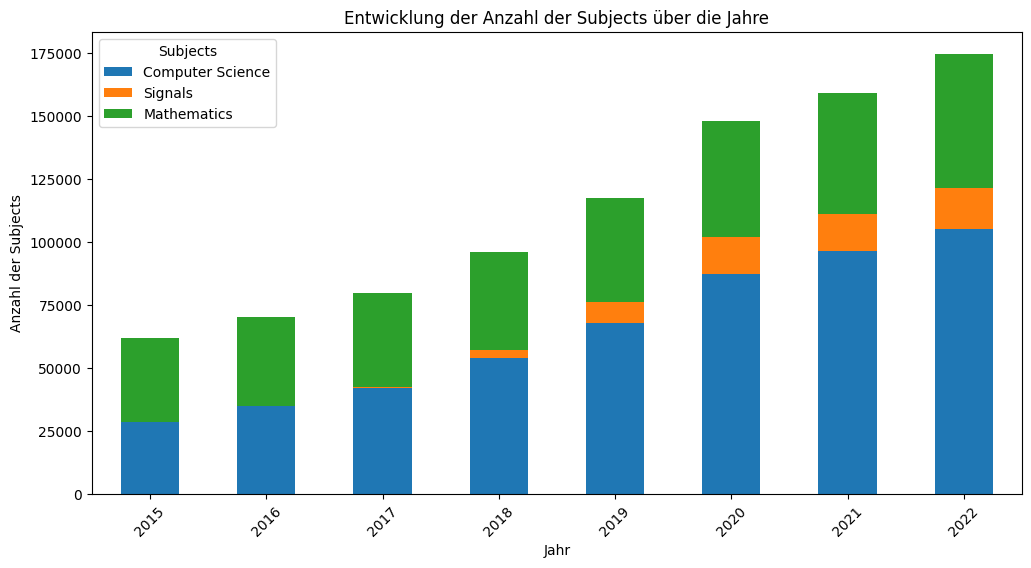

In [173]:


df_top_3_plot = df_top_3_subjects_excl_2023.groupby('date')[['Computer Science', 'Signals', 'Mathematics',]].sum()
# Plot das Liniendiagramm
df_top_3_plot.plot(kind='bar', stacked = True, figsize=(12, 6))

plt.title('Entwicklung der Anzahl der Subjects über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Subjects')
plt.legend(title='Subjects')
plt.xticks(rotation=45)
plt.show()

# Topic Trend Analysis

In [93]:
import pandas as pd
import json
import datetime

In [116]:
df = df_top_3_subjects_excl_2023

In [118]:
df.head()

,id,authors,title,categories,datetime,date,Computer Science,Mathematics,Signals
32,704.0033,"Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...",Convergence of the discrete dipole approximati...,"[physics.optics, physics.comp-ph]",2022-03-29 18:21:31,2022,True,False,False
37,704.0038,"Maxim A. Yurkin, Alfons G. Hoekstra",The discrete dipole approximation: an overview...,"[physics.optics, physics.comp-ph]",2022-03-29 17:39:15,2022,True,False,False
188,704.0189,J. C. Birget,Monoid generalizations of the Richard Thompson...,[math.GR],2016-01-26 14:05:55,2016,False,True,False
478,704.0479,T.Geisser,The affine part of the Picard scheme,"[math.AG, math.KT]",2021-01-28 08:53:14,2021,False,True,False
557,704.0558,"Andreas H\""oring",M-regularity of the Fano surface,[math.AG],2017-12-18 09:40:44,2017,False,True,False


In [119]:
df.to_csv('df_top_3_subjects_excl.csv', index=False)

In [120]:
df = pd.read_csv('df_top_3_subjects_excl.csv')

C:\Users\thoma\AppData\Local\Temp\ipykernel_39328\3537265276.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_top_3_subjects_excl.csv')


In [121]:
df['datetime']=pd.to_datetime(df['datetime'])

Count the Publications for each subjects over the years

In [122]:
df.head(100)

,id,authors,title,categories,datetime,date,Computer Science,Mathematics,Signals
0,704.0033,"Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...",Convergence of the discrete dipole approximati...,"['physics.optics', 'physics.comp-ph']",2022-03-29 18:21:31,2022,True,False,False
1,704.0038,"Maxim A. Yurkin, Alfons G. Hoekstra",The discrete dipole approximation: an overview...,"['physics.optics', 'physics.comp-ph']",2022-03-29 17:39:15,2022,True,False,False
2,704.0189,J. C. Birget,Monoid generalizations of the Richard Thompson...,['math.GR'],2016-01-26 14:05:55,2016,False,True,False
3,704.0479,T.Geisser,The affine part of the Picard scheme,"['math.AG', 'math.KT']",2021-01-28 08:53:14,2021,False,True,False
4,704.0558,"Andreas H\""oring",M-regularity of the Fano surface,['math.AG'],2017-12-18 09:40:44,2017,False,True,False
...,...,...,...,...,...,...,...,...,...
95,710.0681,Daniel A. Ramras,Yang-Mills theory over surfaces and the Atiyah...,"['math.AT', 'math.DG', 'math.KT']",2018-05-08 15:29:29,2018,False,True,False
96,710.1307,Esteban Guevara Hidalgo,"Common Markets, Strong Currencies & the Collec...","['q-fin.GN', 'physics.soc-ph']",2016-12-08 23:50:24,2016,True,False,False
97,710.1525,"Sebastiano Vigna, Paolo Boldi",Efficient Optimally Lazy Algorithms for Minima...,"['cs.DS', 'cs.IR']",2016-08-11 08:57:30,2016,True,False,False
98,710.1594,Chandru Iyer and G.M. Prabhu,Time Dilation and the Equivalence of Inertial ...,['physics.gen-ph'],2022-04-25 10:22:51,2022,True,False,False




# Generate a Wordcloud from Title

In [123]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [124]:
from wordcloud import WordCloud

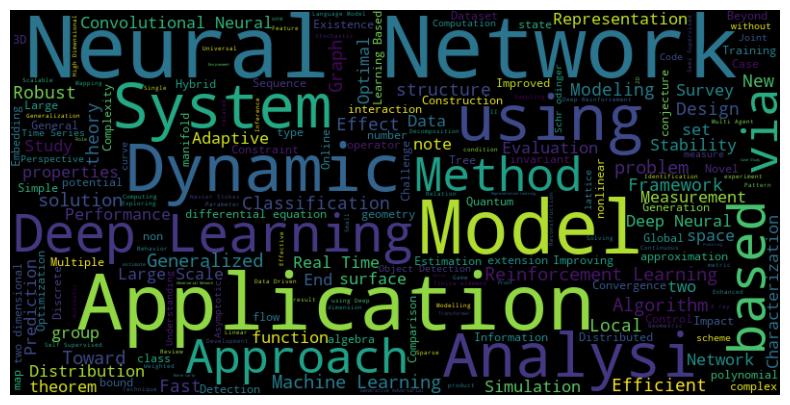

In [125]:


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Annahme: df ist dein DataFrame und 'title' ist die Spalte mit den Titeltexten
title_text = ' '.join(df['title'])

# Erstelle eine WordCloud
wordcloud = WordCloud(width=800, height=400).generate(title_text)

# Zeige die WordCloud an
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



# Topic Modeling (LDA)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('df_top_3_subjects_excl.csv')

C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\3537265276.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_top_3_subjects_excl.csv')


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [6]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thoma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thoma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [141]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Advanced Analysis Topic Analysis

In [8]:
df_math = df[df['Mathematics'] == True]
df_CS = df[df['Computer Science'] == True]
df_signals = df[df['Signals'] == True]

In [9]:
df_signals.head(50)

,id,authors,title,categories,datetime,date,Computer Science,Mathematics,Signals
1165,1010.6096,"Mohammad Amin Ahmad Akhoundi, Ehsan Valavi",Multi-Sensor Fuzzy Data Fusion Using Sensors w...,"['eess.SY', 'cs.SY']",2019-09-08 20:06:02,2019,True,False,True
1198,1011.3189,"Chamberlain Fong, Brian K. Vogel",Warping Peirce Quincuncial Panoramas,"['cs.CV', 'cs.GR', 'eess.IV']",2015-09-26 21:26:34,2015,True,False,True
17702,1410.1272,"Tong Zhao, Tianyao Huang",Cramer-Rao Lower Bounds of Joint Delay-Doppler...,['eess.SP'],2015-02-06 02:12:34,2015,False,False,True
22406,1412.7725,Zhicheng Yan and Hao Zhang and Baoyuan Wang an...,Automatic Photo Adjustment Using Deep Neural N...,"['cs.CV', 'cs.GR', 'cs.LG', 'eess.IV']",2015-05-16 03:49:35,2015,True,False,True
26780,1501.07496,E.L.F. Da Silva and H.M. de Oliveira,Implementation of an Automatic Syllabic Divisi...,"['cs.SD', 'cs.CL', 'cs.DS', 'eess.AS']",2015-01-29 16:09:17,2015,True,False,True
27911,1502.01566,"H.M. de Oliveira, R.M. Campello de Souza and R...",A Matrix Laurent Series-based Fast Fourier Tra...,"['cs.DS', 'cs.DM', 'eess.SP']",2015-02-05 14:25:33,2015,True,False,True
28944,1502.03371,"R.M. Campello de Souza, H.M. de Oliveira and D...",The Z Transform over Finite Fields,"['math.NT', 'cs.NA', 'eess.SP']",2015-02-11 16:56:30,2015,True,True,True
28953,1502.03387,"R.F.B. Sotero Filho, H.M. de Oliveira, R.M. Ca...",A Full Frequency Masking Vocoder for Legal Eav...,"['cs.SD', 'eess.AS']",2015-02-11 17:30:48,2015,True,False,True
29615,1502.04548,"Vicen\c{c} G\'omez, Sep Thijssen, Andrew Symin...",Real-Time Stochastic Optimal Control for Multi...,"['eess.SY', 'cs.MA', 'cs.RO', 'cs.SY']",2020-05-12 18:12:33,2020,True,False,True
30370,1502.0588,"R.C. de Oliveira, H.M. de Oliveira, R.M. Campe...",A Flexible Implementation of a Matrix Laurent ...,"['cs.NA', 'cs.DM', 'eess.SP']",2015-02-20 14:14:50,2015,True,False,True


In [10]:

df_math['title_tokens'] = df_math['title'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
df_CS['title_tokens'] = df_CS['title'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
df_signals['title_tokens'] = df_signals['title'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))

C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\3822030336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math['title_tokens'] = df_math['title'].apply(word_tokenize)
C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\3822030336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CS['title_tokens'] = df_CS['title'].apply(word_tokenize)
C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\3822030336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [155]:
df['title_tokens'] = df['title'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
#df['title_tokens'] = df['title_tokens'].apply(lambda tokens: [word for word in tokens if word.isalpha() and word not in stop_words])

In [198]:
# TODO: eliminate Upper case

In [16]:
df_math['title_tokens'] = df_math['title_tokens'].apply(lambda tokens: [word.lower() for word in tokens if word.isalpha() and word not in stop_words])
df_CS['title_tokens'] = df_CS['title_tokens'].apply(lambda tokens: [word.lower() for word in tokens if word.isalpha() and word not in stop_words])
df_signals['title_tokens'] = df_signals['title_tokens'].apply(lambda tokens: [word.lower() for word in tokens if word.isalpha() and word not in stop_words])

C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\2789270100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math['title_tokens'] = df_math['title_tokens'].apply(lambda tokens: [word.lower() for word in tokens if word.isalpha() and word not in stop_words])
C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\2789270100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CS['title_tokens'] = df_CS['title_tokens'].apply(lambda tokens: [word.lower() for word in tokens if word.isalpha() and word not in s

In [17]:
print(df_math['title_tokens'])

2                 [monoid, gener, richard, thompson, group]
3                             [affin, part, picard, scheme]
4                                            [fano, surfac]
5                                           [ring, algebra]
6         [project, hilbert, space, structur, except, po...
                                ...                        
787437    [pbw, basi, lusztig, form, untwist, affin, qua...
787438                        [dual, affin, quantum, group]
787440           [time, finit, statist, bell, fifth, posit]
787445    [quantum, list, decod, classic, block, code, p...
787447                  [decoupl, approach, quantum, capac]
Name: title_tokens, Length: 333290, dtype: object


In [14]:

# Stemming (or Lemmatization)
stemmer = PorterStemmer()
df_math['title_tokens'] = df_math['title_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
df_CS['title_tokens'] = df_CS['title_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
df_signals['title_tokens'] = df_signals['title_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\3217547872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math['title_tokens'] = df_math['title_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\3217547872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CS['title_tokens'] = df_CS['title_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\3217547872.py:5:

In [18]:
print(df_math['title_tokens'][0:200])

2              [monoid, gener, richard, thompson, group]
3                          [affin, part, picard, scheme]
4                                         [fano, surfac]
5                                        [ring, algebra]
6      [project, hilbert, space, structur, except, po...
                             ...                        
244                                 [degener, conjectur]
245      [connect, compon, partit, preserv, diffeomorph]
246           [concentr, chromat, number, random, graph]
248                           [zero, fourier, transform]
249    [twist, exterior, deriv, univers, envelop, alg...
Name: title_tokens, Length: 200, dtype: object


# Mathematics Topic Modelling

In [19]:
from gensim import corpora, models
from tqdm import tqdm  # Import tqdm

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df_math['title_tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_math['title_tokens']]

# Train LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Get topics for each paper
tqdm.pandas()  # Use tqdm with pandas
df_math['lda_topics'] = df_math['title_tokens'].progress_apply(lambda tokens: lda_model[dictionary.doc2bow(tokens)])

# Print the top words for each topic
for topic_id in range(num_topics):
    print(f"Topic {topic_id}: {lda_model.print_topic(topic_id)}")


100%|██████████| 333290/333290 [01:01<00:00, 5408.49it/s]
C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\2228424978.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math['lda_topics'] = df_math['title_tokens'].progress_apply(lambda tokens: lda_model[dictionary.doc2bow(tokens)])


Topic 0: 0.034*"graph" + 0.029*"space" + 0.027*"function" + 0.020*"theorem" + 0.019*"number" + 0.015*"set" + 0.015*"oper" + 0.014*"gener" + 0.013*"bound" + 0.013*"inequ"
Topic 1: 0.043*"equat" + 0.030*"problem" + 0.021*"method" + 0.020*"model" + 0.019*"system" + 0.018*"solut" + 0.014*"optim" + 0.013*"stochast" + 0.013*"control" + 0.013*"estim"
Topic 2: 0.019*"surfac" + 0.014*"curv" + 0.013*"space" + 0.011*"form" + 0.011*"commun" + 0.010*"geometri" + 0.010*"varieti" + 0.009*"invari" + 0.009*"algebra" + 0.009*"modul"
Topic 3: 0.027*"network" + 0.024*"optim" + 0.020*"learn" + 0.019*"distribut" + 0.015*"system" + 0.015*"random" + 0.015*"code" + 0.013*"model" + 0.011*"p" + 0.010*"approach"
Topic 4: 0.050*"group" + 0.031*"algebra" + 0.024*"quantum" + 0.020*"theori" + 0.018*"finit" + 0.011*"lie" + 0.010*"field" + 0.010*"topolog" + 0.010*"represent" + 0.010*"n"


In [26]:
df_math.head(100)

,id,authors,title,categories,datetime,date,Computer Science,Mathematics,Signals,title_tokens,lda_topics,title_string,main_topic
2,704.0189,J. C. Birget,Monoid generalizations of the Richard Thompson...,['math.GR'],2016-01-26 14:05:55,2016,False,True,False,"[monoid, gener, richard, thompson, group]","[(0, 0.03372273), (1, 0.22057647), (2, 0.03354...",monoid gener richard thompson group,4
3,704.0479,T.Geisser,The affine part of the Picard scheme,"['math.AG', 'math.KT']",2021-01-28 08:53:14,2021,False,True,False,"[affin, part, picard, scheme]","[(0, 0.040119175), (1, 0.04038571), (2, 0.8391...",affin part picard scheme,2
4,704.0558,"Andreas H\""oring",M-regularity of the Fano surface,['math.AG'],2017-12-18 09:40:44,2017,False,True,False,"[fano, surfac]","[(0, 0.066669606), (1, 0.066669606), (2, 0.733...",fano surfac,2
5,704.0775,Efton Park and Jody Trout,K_0-theory of n-potents in rings and algebras,"['math.KT', 'math.RA']",2018-09-06 20:32:05,2018,False,True,False,"[ring, algebra]","[(0, 0.0666674), (1, 0.0666674), (2, 0.0674624...",ring algebra,4
6,704.1291,"Uwe Guenther, Ingrid Rotter, Boris F. Samsonov",Projective Hilbert space structures at excepti...,"['math-ph', 'cond-mat.other', 'math.MP', 'quan...",2018-11-12 14:51:20,2018,False,True,False,"[project, hilbert, space, structur, except, po...","[(0, 0.029344615), (1, 0.028644307), (2, 0.681...",project hilbert space structur except point,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,711.3497,Vladimir Nikiforov,The energy of C4-free graphs of bounded degree,['math.CO'],2021-04-08 14:37:55,2021,False,True,False,"[energi, graph, bound, degre]","[(0, 0.6234198), (1, 0.04116711), (2, 0.040173...",energi graph bound degre,0
128,711.3706,G.S.Makanin,Poincare's Conjecture for three manifolds,['math.GM'],2017-09-14 14:00:13,2017,False,True,False,"[poincar, conjectur, three, manifold]","[(0, 0.8390928), (1, 0.04000738), (2, 0.040885...",poincar conjectur three manifold,0
129,711.3708,G.S.Makanin,Equations in a free group. Elementary theory,['math.GM'],2017-09-14 14:05:46,2017,False,True,False,"[equat, free, group, elementari, theori]","[(0, 0.03333421), (1, 0.20000172), (2, 0.03342...",equat free group elementari theori,4
130,711.3782,Gabriel Vigny,Lelong-Skoda transform for compact Kaehler man...,['math.CV'],2019-12-17 10:20:20,2019,False,True,False,"[transform, compact, kaehler, manifold, inequ]","[(0, 0.42794743), (1, 0.19730398), (2, 0.30763...",transform compact kaehler manifold inequ,0


C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\4031255225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math['main_topic'] = df_math['lda_topics'].apply(lambda topics: max(topics, key=lambda x: x[1])[0])


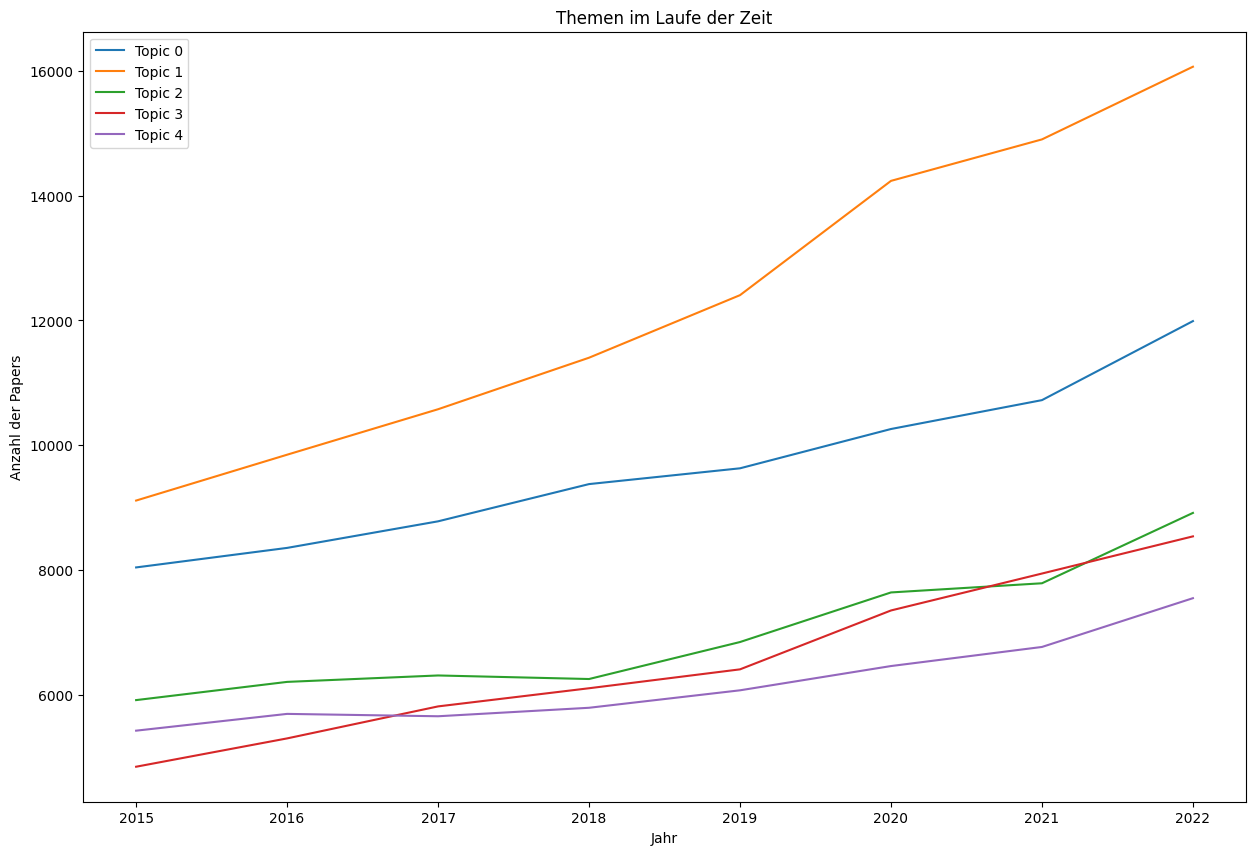

In [27]:
import matplotlib.pyplot as plt

# Das Hauptthema für jedes Paper bestimmen (basierend auf dem höchsten Wert)
df_math['main_topic'] = df_math['lda_topics'].apply(lambda topics: max(topics, key=lambda x: x[1])[0])

plt.figure(figsize=(15, 10))

# Themen im Laufe der Zeit visualisieren
for topic_id in range(num_topics):
    yearly_counts = df_math[df_math['main_topic'] == topic_id]['date'].value_counts().sort_index()
    plt.plot(yearly_counts.index, yearly_counts.values, label=f"Topic {topic_id}")

plt.title("Themen im Laufe der Zeit")
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Papers")
plt.legend()
plt.show()


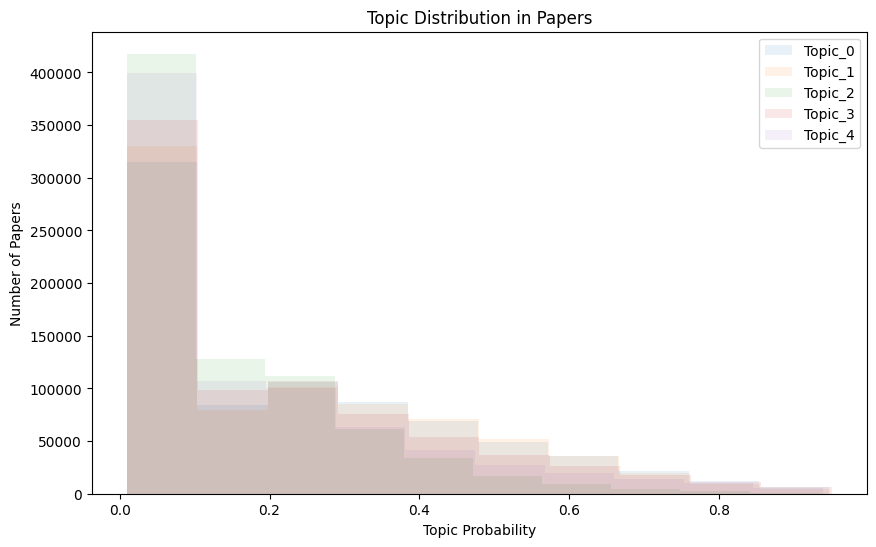

In [167]:
import matplotlib.pyplot as plt

# Visualize topic distribution
topic_distribution = df['lda_topics'].apply(lambda x: [t[1] for t in x])
topic_df = pd.DataFrame(topic_distribution.tolist(), columns=[f'Topic_{i}' for i in range(num_topics)])

# Plot
plt.figure(figsize=(10, 6))
for topic in topic_df.columns:
    plt.hist(topic_df[topic], alpha=0.1, label=topic)
plt.xlabel('Topic Probability')
plt.ylabel('Number of Papers')
plt.legend()
plt.title('Topic Distribution in Papers')
plt.show()


In [133]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pyLDAvis
import pyLDAvis.gensim_models

# Prepare the data for visualization
vis_data_math = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Create the visualization
pyLDAvis.display(vis_data_math)


# CS Topic Modelling

In [31]:
#Create a dictionary and corpus
dictionary = corpora.Dictionary(df_CS['title_tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_CS['title_tokens']]

# Train LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Get topics for each paper
tqdm.pandas()  # Use tqdm with pandas
df_CS['lda_topics'] = df_CS['title_tokens'].progress_apply(lambda tokens: lda_model[dictionary.doc2bow(tokens)])

# Print the top words for each topic
for topic_id in range(num_topics):
    print(f"Topic {topic_id}: {lda_model.print_topic(topic_id)}")

100%|██████████| 516465/516465 [01:50<00:00, 4660.58it/s]

Topic 0: 0.017*"model" + 0.015*"estim" + 0.014*"transform" + 0.014*"via" + 0.013*"gener" + 0.013*"method" + 0.013*"adversari" + 0.012*"train" + 0.011*"optim" + 0.010*"robust"
Topic 1: 0.026*"graph" + 0.018*"optim" + 0.014*"problem" + 0.014*"comput" + 0.013*"system" + 0.011*"algorithm" + 0.011*"flow" + 0.010*"code" + 0.009*"equat" + 0.009*"complex"
Topic 2: 0.018*"quantum" + 0.011*"dataset" + 0.011*"robot" + 0.010*"energi" + 0.010*"field" + 0.010*"effect" + 0.009*"optic" + 0.009*"dynam" + 0.008*"attent" + 0.008*"simul"
Topic 3: 0.071*"learn" + 0.043*"network" + 0.025*"neural" + 0.024*"detect" + 0.022*"deep" + 0.021*"data" + 0.020*"use" + 0.017*"imag" + 0.016*"model" + 0.015*"predict"
Topic 4: 0.026*"model" + 0.021*"languag" + 0.018*"reinforc" + 0.016*"object" + 0.016*"method" + 0.015*"system" + 0.013*"use" + 0.007*"assess" + 0.007*"recommend" + 0.007*"physic"



C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\2304591322.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CS['lda_topics'] = df_CS['title_tokens'].progress_apply(lambda tokens: lda_model[dictionary.doc2bow(tokens)])


In [32]:

import matplotlib.pyplot as plt

# Das Hauptthema für jedes Paper bestimmen (basierend auf dem höchsten Wert)
df_CS['main_topic'] = df_CS['lda_topics'].apply(lambda topics: max(topics, key=lambda x: x[1])[0])

plt.figure(figsize=(15, 10))

# Themen im Laufe der Zeit visualisieren
for topic_id in range(num_topics):
    yearly_counts = df_CS[df_math['main_topic'] == topic_id]['date'].value_counts().sort_index()
    plt.plot(yearly_counts.index, yearly_counts.values, label=f"Topic {topic_id}")

plt.title("Themen im Laufe der Zeit")
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Papers")
plt.legend()
plt.show()


C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\1978579470.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CS['main_topic'] = df_CS['lda_topics'].apply(lambda topics: max(topics, key=lambda x: x[1])[0])
C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\1978579470.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_counts = df_CS[df_math['main_topic'] == topic_id]['date'].value_counts().sort_index()


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Figure size 1500x1000 with 0 Axes>

In [ ]:
import pyLDAvis.gensim_models

# Prepare the data for visualization
vis_data_CS = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Create the visualization
pyLDAvis.display(vis_data_CS)

# Signals Topic Modellingh

In [33]:
#Create a dictionary and corpus
dictionary = corpora.Dictionary(df_signals['title_tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_signals['title_tokens']]

# Train LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Get topics for each paper
tqdm.pandas()  # Use tqdm with pandas
df_signals['lda_topics'] = df_signals['title_tokens'].progress_apply(lambda tokens: lda_model[dictionary.doc2bow(tokens)])

# Print the top words for each topic
for topic_id in range(num_topics):
    print(f"Topic {topic_id}: {lda_model.print_topic(topic_id)}")

100%|██████████| 57472/57472 [00:17<00:00, 3238.34it/s]

Topic 0: 0.039*"learn" + 0.037*"network" + 0.031*"use" + 0.031*"deep" + 0.031*"speech" + 0.028*"neural" + 0.022*"detect" + 0.022*"segment" + 0.022*"imag" + 0.019*"recognit"
Topic 1: 0.054*"control" + 0.054*"system" + 0.025*"model" + 0.021*"learn" + 0.018*"power" + 0.015*"optim" + 0.015*"dynam" + 0.014*"predict" + 0.013*"linear" + 0.013*"nonlinear"
Topic 2: 0.042*"imag" + 0.019*"use" + 0.013*"estim" + 0.012*"model" + 0.012*"reconstruct" + 0.011*"compress" + 0.011*"learn" + 0.011*"base" + 0.011*"medic" + 0.010*"method"
Topic 3: 0.021*"network" + 0.018*"system" + 0.017*"optim" + 0.017*"control" + 0.014*"energi" + 0.013*"distribut" + 0.013*"vehicl" + 0.011*"use" + 0.010*"model" + 0.010*"approach"
Topic 4: 0.028*"commun" + 0.022*"system" + 0.021*"channel" + 0.019*"mimo" + 0.018*"network" + 0.018*"intellig" + 0.017*"learn" + 0.013*"joint" + 0.013*"deep" + 0.013*"massiv"



C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\734751450.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_signals['lda_topics'] = df_signals['title_tokens'].progress_apply(lambda tokens: lda_model[dictionary.doc2bow(tokens)])


In [34]:

import matplotlib.pyplot as plt

# Das Hauptthema für jedes Paper bestimmen (basierend auf dem höchsten Wert)
df_signals['main_topic'] = df_signals['lda_topics'].apply(lambda topics: max(topics, key=lambda x: x[1])[0])

plt.figure(figsize=(15, 10))

# Themen im Laufe der Zeit visualisieren
for topic_id in range(num_topics):
    yearly_counts = df_signals[df_math['main_topic'] == topic_id]['date'].value_counts().sort_index()
    plt.plot(yearly_counts.index, yearly_counts.values, label=f"Topic {topic_id}")

plt.title("Themen im Laufe der Zeit")
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Papers")
plt.legend()
plt.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\2038462461.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_signals['main_topic'] = df_signals['lda_topics'].apply(lambda topics: max(topics, key=lambda x: x[1])[0])
C:\Users\thoma\AppData\Local\Temp\ipykernel_18768\2038462461.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_counts = df_signals[df_math['main_topic'] == topic_id]['date'].value_counts().sort_index()


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Figure size 1500x1000 with 0 Axes>

In [ ]:
import pyLDAvis.gensim_models

# Prepare the data for visualization
vis_data_Signals = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Create the visualization
pyLDAvis.display(vis_data_Signals)

# Conclusion

In [166]:
import pyLDAvis
import pyLDAvis.gensim_models

# Prepare the data for visualization
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Create the visualization
pyLDAvis.display(vis_data)
